In [30]:
import os
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt

from numpy import expand_dims
!rm -r logdir
!rm -r "untitled_project"

%load_ext tensorboard

rm: cannot remove 'untitled_project': No such file or directory
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


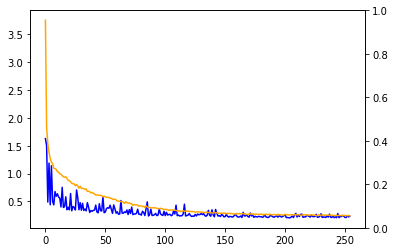

Results of the model training
26/26 [==============================] - 0s 991us/step - loss: 0.2368 - mae: 0.2368 - mape: 5.2508 - R_Square: 0.9041
[0.23682798445224762, 0.23682798445224762, 5.2508063316345215, 0.9041228890419006]


<Figure size 432x288 with 0 Axes>

In [31]:
%run final_model.py

In [32]:
import tensorboard
%load_ext tensorboard
%tensorboard --logdir logdir

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 8636), started 0:08:52 ago. (Use '!kill 8636' to kill it.)

<AxesSubplot:xlabel='true', ylabel='preds'>

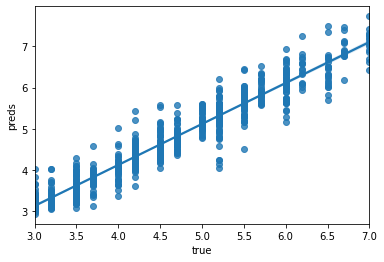

In [33]:
import pandas as pd
import numpy as np
preds = model.predict([Features_TestA, Features_TestG])
import seaborn as sns; 
#sns.set_theme(color_codes=True)
data = pd.DataFrame(np.hstack([Labels_TestA, preds]), columns = ['true', 'preds'])
sns.regplot(x = 'true', y = 'preds',data = data,)

In [34]:
!nvidia-smi

Tue Dec  8 18:19:07 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 207...  On   | 00000000:0A:00.0  On |                  N/A |
| 30%   68C    P2    71W / 215W |   7640MiB /  7979MiB |     42%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [35]:
filters = list()
layers = list()
for layer in model.layers:
    if "conv" in layer.name:
        print(layer.name)
        filter, bias = layer.get_weights()
        filters.append(filter)
        layers.append(layer)
        print(filter.shape)
np.array(filters[0][0])

conv2d_8
(3, 3, 1, 27)
conv2d_10
(3, 3, 1, 27)
conv2d_9
(3, 3, 27, 45)
conv2d_11
(3, 3, 27, 45)


array([[[-0.01501752, -0.02364465, -0.08749825, -0.03778775,
          0.0979353 , -0.04301868, -0.19277313, -0.03495834,
          0.07597829, -0.02994208, -0.06997924, -0.01484663,
         -0.14983037, -0.13228334,  0.05829474, -0.15907831,
          0.17764376, -0.1952343 , -0.04432348, -0.08543482,
         -0.06202994,  0.06183409, -0.02922332, -0.0615059 ,
          0.08902091, -0.13420357, -0.20949136]],

       [[ 0.17979887, -0.01557882, -0.00037107, -0.08048806,
         -0.06679031, -0.00486631,  0.18017952, -0.05807524,
         -0.0202074 , -0.04438226,  0.04758498, -0.02534214,
          0.07946234, -0.04305073, -0.19569221,  0.04191977,
         -0.12939316, -0.0376654 ,  0.02448676,  0.1229716 ,
          0.10041644, -0.11376988,  0.11216307,  0.01701556,
          0.05439476,  0.08123712,  0.15414608]],

       [[-0.22403312, -0.10427675, -0.01579014,  0.14899182,
         -0.05918077, -0.06283532, -0.05364006,  0.14838402,
         -0.15533692,  0.04087049,  0.098064

In [7]:
arr = np.swapaxes(np.array(filters[0]), 0,2)[30].reshape(3,5,1)

In [8]:
bias

array([ 2.01769336e-03,  3.04961985e-04,  1.59718539e-03, -5.17176813e-04,
        8.59826861e-04,  4.58992785e-04,  1.18465186e-03, -6.82325626e-04,
        1.47488972e-04,  1.32093646e-05, -5.37039363e-04, -4.61773307e-04,
       -1.55399575e-05, -6.15017081e-04, -2.48463289e-03, -2.27131438e-03,
       -3.53204290e-04,  6.36884652e-04,  6.61178492e-04,  4.02539241e-04,
       -3.34451761e-04, -5.91432035e-04,  8.39827408e-04,  2.34343112e-04,
       -1.11118669e-03,  1.12886031e-04,  1.92432827e-03,  2.01456685e-04,
        8.29410157e-04, -1.00049085e-03,  4.83738957e-04,  3.20224208e-04,
       -1.76759111e-03, -3.58609017e-04, -1.15795381e-04,  2.04308526e-04,
       -2.02411626e-04,  1.75078621e-05, -7.93120184e-04,  1.32772443e-03,
        1.39225961e-03, -1.12790294e-04,  4.94972395e-04,  4.22066980e-04,
        3.94013507e-04], dtype=float32)

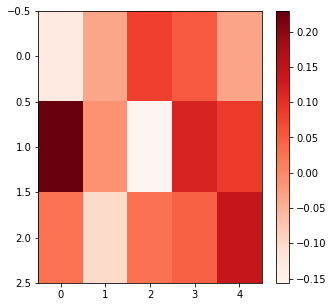

In [9]:
plt.figure(figsize = (5,5))
plt.imshow(arr, interpolation='nearest', aspect='auto', cmap= 'Reds')
plt.colorbar()
plt.show()
%matplotlib inline

In [10]:
# normalize filter values to 0-1 so we can visualize them
#f_min, f_max = filters.min(), filters.max()



filters = [(f - f.min()) / (f.max() - f.min()) for f in filters]

In [11]:
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

TypeError: list indices must be integers or slices, not tuple

In [ ]:
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [36]:
Features_TestG.shape

(820, 3, 150, 1)

In [37]:
Features_TestG[0].shape

(3, 150, 1)

IndexError: index 1 is out of bounds for axis 0 with size 1

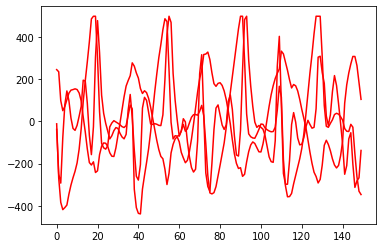

In [38]:


def plot_xyz(to_plot, plot=True,ax=None):
    if not plot:
        ax.plot(range(to_plot.shape[1]),to_plot[0], color="red", label="x")
        ax.plot(range(to_plot.shape[1]),to_plot[1], color="green", label="y")
        ax.plot(range(to_plot.shape[1]),to_plot[2], color="blue", label="z")
        ax.legend()
        plt.show()
        return ax
    else:
        plt.plot(range(to_plot.shape[1]),to_plot[0]-np.mean(to_plot[0]) , color="red", label="x")
        plt.plot(range(to_plot.shape[1]),to_plot[1]-np.mean(to_plot[1]), color="green", label="y")
        plt.plot(range(to_plot.shape[1]),to_plot[2]-np.mean(to_plot[2]), color="blue", label="z")
        plt.legend()
        plt.show()
        %matplotlib inline

to_plot= Features_TestG[10].T
plot_xyz(to_plot)

In [ ]:
# np.sqrt(np.square(to_plot[0]))

In [ ]:
import numpy as np
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
gradient.shape

In [17]:
print([layer.name for layer in model.layers])

['input_1', 'conv1D_A1', 'batch_normalization', 'input_2', 'leaky_re_lu', 'conv1D_G1', 'conv1D_A2', 'batch_normalization_2', 'batch_normalization_1', 'leaky_re_lu_2', 'activation', 'conv1D_G2', 'global_max_pooling1d', 'batch_normalization_3', 'add', 'add_1', 'leaky_re_lu_1', 'leaky_re_lu_3', 'global_max_pooling1d_1', 'global_max_pooling1d_2', 'concatenate', 'dense', 'dropout', 'dense_1', 'dropout_1', 'dense_2']


In [18]:
mod6 = model.layers[6]


In [19]:
# mod6.weights


[<tf.Variable 'conv1D_A2/kernel:0' shape=(5, 45, 45) dtype=float32, numpy=
 array([[[ 0.12474524,  0.10022828, -0.1499252 , ...,  0.09893166,
          -0.00228399, -0.10117186],
         [ 0.09845836, -0.14483947,  0.04909223, ..., -0.08200361,
           0.08341494,  0.02548179],
         [-0.1377617 , -0.08102763, -0.01017321, ...,  0.0977572 ,
          -0.08588693, -0.00705246],
         ...,
         [ 0.10600537, -0.18283269, -0.05179762, ...,  0.10449828,
           0.0640064 , -0.00737637],
         [-0.07622513,  0.05391249, -0.11982346, ...,  0.11505297,
          -0.03686694,  0.13315576],
         [-0.1532757 ,  0.06566364,  0.05779642, ...,  0.01201545,
           0.05896244,  0.02055336]],
 
        [[-0.02196892, -0.05245958, -0.08152442, ...,  0.0084778 ,
           0.10720273, -0.17000394],
         [ 0.03267451, -0.15018605, -0.08865488, ...,  0.02667976,
          -0.1626924 ,  0.01753551],
         [-0.20633842, -0.09340729, -0.05980752, ..., -0.05309893,
         

In [20]:
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 3)]     0                                            
__________________________________________________________________________________________________
conv1D_A1 (Conv1D)              (None, 146, 45)      720         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 146, 45)      180         conv1D_A1[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 150, 3)]     0                                            
_______________________________________________________________________________________

In [21]:
# redefine model to output right after the first hidden layer
from keras.models import Model
# model_min = model.inputs[0]
# model_min = layers[0](model_min)
# model_min = layers[2](model_min)
import numpy as np
model_min=np.nan
model_min = Model(inputs=model.inputs[0], outputs=model.layers[10].output)
model_min.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 3)]          0         
_________________________________________________________________
conv1D_A1 (Conv1D)           (None, 146, 45)           720       
_________________________________________________________________
batch_normalization (BatchNo (None, 146, 45)           180       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 146, 45)           0         
_________________________________________________________________
conv1D_A2 (Conv1D)           (None, 146, 45)           10170     
_________________________________________________________________
batch_normalization_1 (Batch (None, 146, 45)           180       
_________________________________________________________________
activation (Activation)      (None, 146, 45)          

In [22]:
datum_ex = Features_TestA[300]
datum = expand_dims(datum_ex, axis=0)
datum_ex = datum_ex.T

In [23]:
feature_maps = model_min.predict(datum)
feature_maps

array([[[1.9370153 , 0.        , 0.78538465, ..., 1.1295946 ,
         0.10451649, 0.54836285],
        [1.3548895 , 0.        , 0.1737175 , ..., 1.4768866 ,
         0.07225703, 0.29186165],
        [0.9767762 , 0.        , 0.        , ..., 1.6851197 ,
         0.        , 0.3095468 ],
        ...,
        [0.4689954 , 0.23029369, 1.4841076 , ..., 0.        ,
         0.85898036, 0.59763896],
        [0.4938776 , 0.        , 0.7092543 , ..., 0.        ,
         0.50564826, 0.5924095 ],
        [0.50767887, 0.09702852, 0.20836896, ..., 0.        ,
         0.06869043, 0.4597594 ]]], dtype=float32)

In [24]:
feature_maps = feature_maps/feature_maps.max()


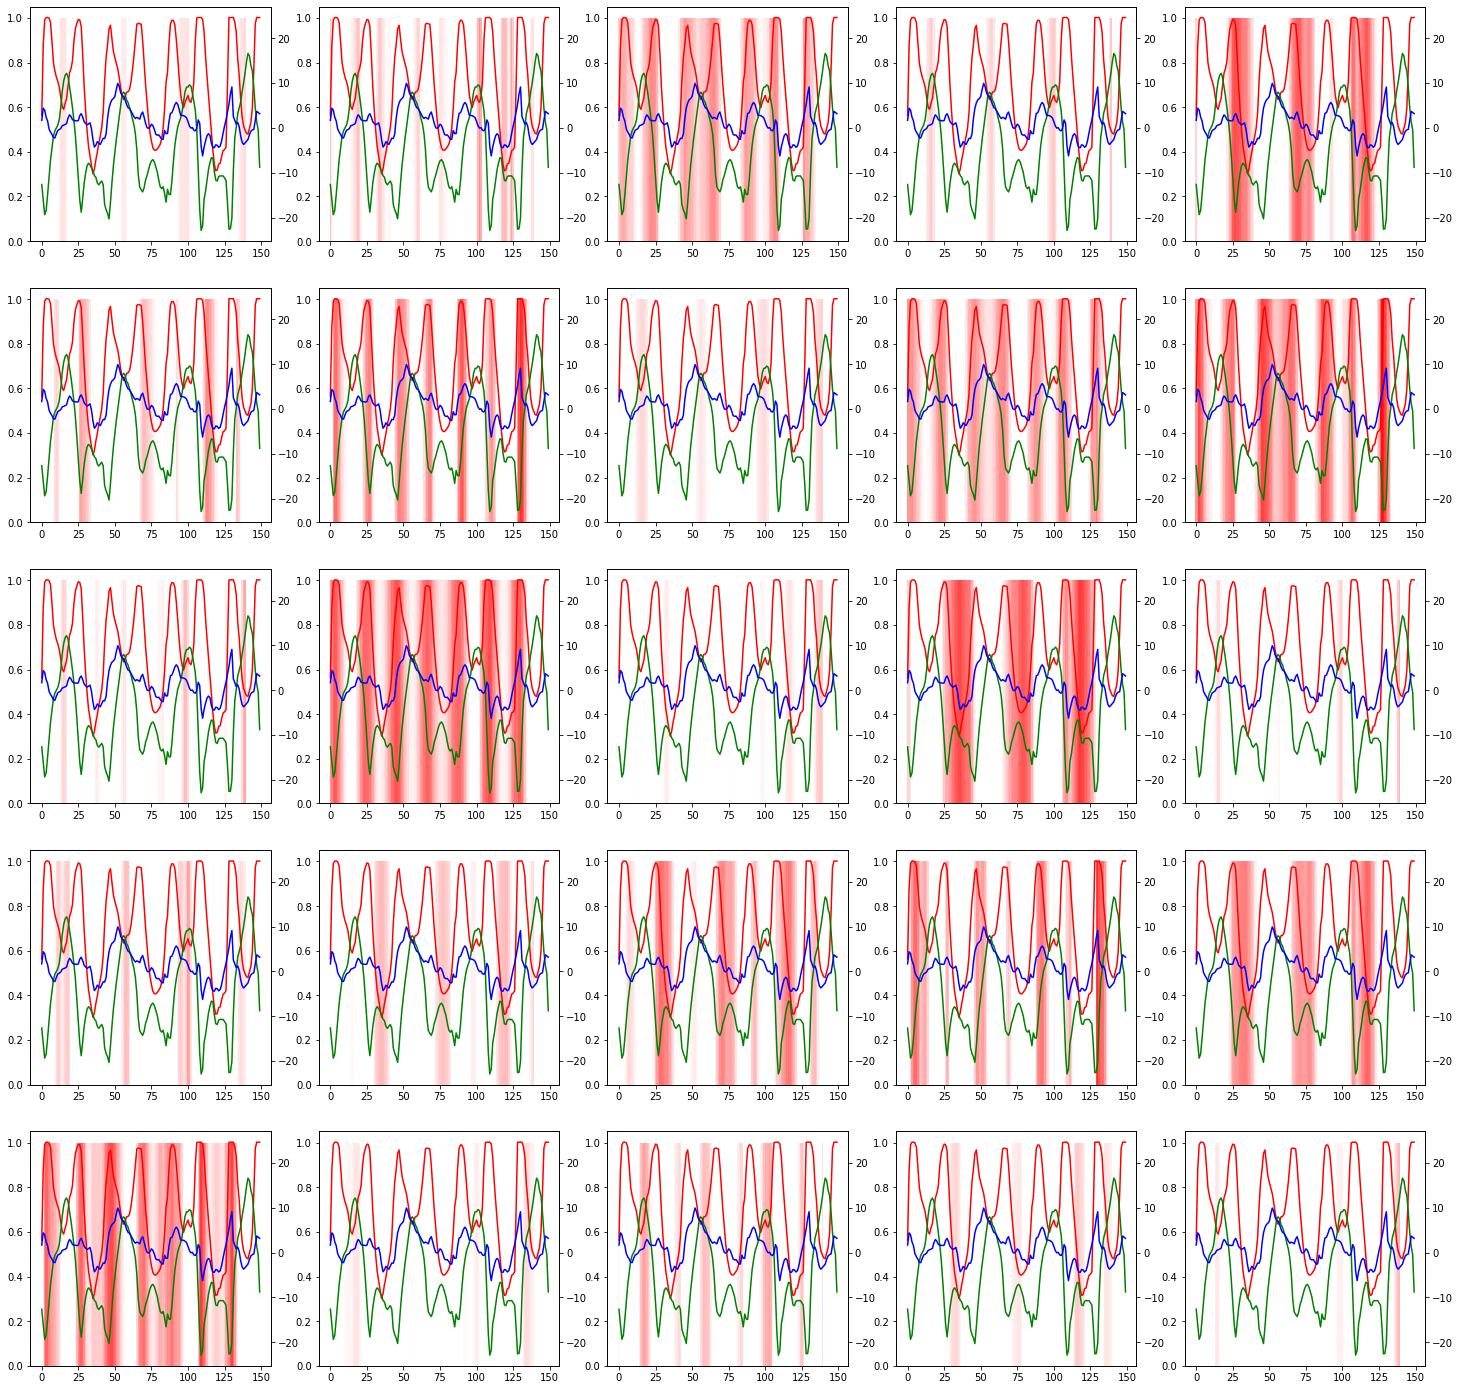

In [25]:
# plot all 64 maps in an 8x8 squares
square = 5
ix = 1

pyplot.figure(figsize=(25,25))
#pyplot.style.use('light_background')


for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis

        ax = pyplot.subplot(square, square, ix)
       # ax.set_xticks([])
        ax.set_facecolor('white')
        #ax.set_yticks([])
        # plot filter channel in grayscale
        #ax = plot_xyz(to_plot,plot=False,ax=ax)
        #pyplot.twinx()
        #pyplot.imshow(feature_maps[0, :, :, ix], aspect='auto', cmap ='PuRd', )
        #pyplot.scatter(feature_maps[0, :, ix])
        for i in range(140):
            pyplot.bar(i,1, color ="red",alpha =feature_maps[0, :, ix][i], width=1)
        pyplot.twinx()
        pyplot.plot(range(datum_ex.shape[1]),datum_ex[0], color="red", label="x")
        pyplot.plot(range(datum_ex.shape[1]),datum_ex[1], color="green", label="y")
        pyplot.plot(range(datum_ex.shape[1]),datum_ex[2], color="blue", label="z")
        #pyplot.twinx()
        ix += 1
# show the figure
pyplot.show()

In [26]:
pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray',aspect="auto")

IndexError: too many indices for array

In [ ]:
plot_xyz(feature_maps[0, :, :, 0])

In [ ]:
plot_xyz(feature_maps[0, :, :, 0])